<a href="https://colab.research.google.com/github/DavidSenseman/BIO5853/blob/main/Lesson_03_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---------------------------

**COPYRIGHT NOTICE:** This Jupyterlab/Colab notebook is a companion supplement to the textbook _Principles of Biostatistics_ by M. Pagano. K. Marcello and H. Mattie (3rd ed) published in 2022 by CRC Press. It is designed to be used in conjunction with -- not as a standalone substitute for – this textbook.  

This notebook is licensed under the Apache License, Version 2.0 (the "License"); You may not use this file except in compliance with the License. You may obtain a copy of the License at
>http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.

------------------------

# **BIO 5853: Biostatistics**

##### **Module 3: Inference**

* Instructor: [David Senseman](mailto:David.Senseman@utsa.edu), [Department of Integrative Biology](https://sciences.utsa.edu/integrative-biology/), [UTSA](https://www.utsa.edu/)


### Module 3 Material

* Part 3.1: Confidence Intervals
* Part 3.2: Hypothesis Testing
* Part 3.3: Comparison of Two Means
* Part 3.4: Analysis of Variance (ANOVA)
* Part 3.5: Nonparametric Methods
* Part 3.6: Inference on Proportions
* Part 3.7: Contingency Tables
* Part 3.8: Correlation
* Part 3.9: Simple Linear Regression
* Part 3.10: Multiple Linear Regression
* Part 3.11: Logistic Regression
* **Part 3.12: Survival Analysis**

## Google CoLab Instructions

The following code ensures that Google CoLab is running the correct version of TensorFlow.
  Running the following code will map your GDrive to ```/content/drive```.

In [1]:
# YOU MUST RUN THIS CODE CELL FIRST

try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    from google.colab import auth
    auth.authenticate_user()
    COLAB = True
    print("Note: using Google CoLab")
    import requests
    gcloud_token = !gcloud auth print-access-token
    gcloud_tokeninfo = requests.get('https://www.googleapis.com/oauth2/v3/tokeninfo?access_token=' + gcloud_token[0]).json()
    print(gcloud_tokeninfo['email'])
except:
    print("Note: not using Google CoLab")
    COLAB = False

Mounted at /content/drive
Note: using Google CoLab
david.senseman@gmail.com


# **Part 3.12: Survival Analysis**

**Survival analysis** is a branch of statistics that deals with the analysis of time-to-event data. The "event" can be any significant occurrence or endpoint of interest, such as death, disease recurrence, equipment failure, etc. The key focus is on estimating the time until the event occurs and understanding the factors that influence this timing.

#### Key Concepts

1. **Survival Function**:
    - Represents the probability that an individual survives beyond a certain time.
    - Typically denoted as \( S(t) \).

2. **Hazard Function**:
    - Describes the instantaneous rate of the event occurring at a particular time, given that the individual has survived up to that time.
    - Denoted as \( \lambda(t) \).

3. **Censoring**:
    - Occurs when the exact time of the event is unknown for some individuals. This can happen due to individuals leaving the study early, the study ending before the event occurs, etc.
    - Censoring is a crucial aspect of survival analysis as it allows for the inclusion of incomplete data.

#### Importance in Biostatistics

Survival analysis is particularly important in biostatistics for several reasons:

1. **Medical Research**:
    - Helps in understanding the effectiveness of treatments and interventions.
    - Used to estimate survival rates for different conditions and to identify risk factors associated with poor outcomes.

2. **Clinical Trials**:
    - Essential for analyzing time-to-event data, such as the time until disease recurrence or progression-free survival.
    - Provides insights into the long-term benefits and risks of treatments.

3. **Public Health**:
    - Supports the development of preventive measures by identifying factors that influence the timing of health-related events.
    - Assists in planning and resource allocation by predicting future trends in disease occurrence and survival rates.

4. **Epidemiology**:
    - Vital for studying the natural history of diseases and the impact of exposures on the timing of health outcomes.
    - Facilitates the comparison of survival experiences between different groups (e.g., exposed vs. unexposed, treated vs. untreated).

Survival analysis provides a comprehensive framework for dealing with time-to-event data, making it indispensable in the field of biostatistics.



### **Introduction**

In Chapter 4 we use the life table to consider the problem of quantifying how long individuals in a population survive as that population ages. More generally, the variable we are interested in may be the length of time from an initial start point until the occurrence of some specified event. This is
often the time from birth until death, but might also be the time from transplant surgery until the new organ fails, or the time from start of maintenance therapy for a patient whose cancer has gone into remission until the relapse of disease. The time interval between the start point and the subsequent event — often called a failure event — is known as the _survival time_. The analysis of time to event data generally focuses on estimating the probability that an individual will survive beyond a given length of time.

One common occurrence when working with survival data is that not all individuals are observed until their respective times of failure. If the time interval between the start point and the subsequent failure event can be quite long, the data may be analyzed before the failure event has occurred in
all study subjects. Not everyone has died, or has experienced organ failure, or has had their cancer return. Others who either move away before the study is complete or who refuse to participate any longer are said to be _lost to follow-up_. The incomplete observation of time to failure is known as _censoring_. The presence of censored observations distinguishes the analysis of survival data from other analyses of continuous measurements.

A distribution of survival times can be characterized by a _survival function_, represented by $S(t)$. $S(t)$ is defined as the probability that an individual survives beyond time $t$. Equivalently, for a given $t$, $S(t)$ specifies the proportion of individuals who have not yet failed at that time. If $T$ is a random variable representing survival time, then

$$ S(t) = P(T>t). $$

The graph of $S(t)$ versus $t$ is called a _survival curve_.

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_12_image01.png)


**FIGURE 20.1** Survival curves for three categories of White males: nonusers of tobacco, moderate smokers, and heavy smokers, 1938.

### **Datasets for this Lesson**

We will be using several differnt datasets for this lesson. As usual, we will need to download them from the course file server and store in DataFrames.

### Example 1A: Read Datafile

We will be using a datafile called `hemophiliac_survival.csv` stored on the course HTTPS server. As the file is read, the data is stored in a DataFrame called `hemoDF`.



In [2]:
# Example 1A: Read datafile

import pandas as pd

# Read datafile and create DataFrame
hemoDF = pd.read_csv(
    "https://biologicslab.co/BIO5853/data/hemophiliac_survival.csv",
    index_col=0,
    sep=',',
    na_values=['NA','?'])

# Set max rows and max columns
pd.set_option('display.max_rows', 6)
pd.set_option('display.max_columns', 8)

# Display DataFrame
display(hemoDF)

,month,survival
1,0,1.0000
2,1,1.0000
3,2,0.9167
...,...,...
31,30,0.0833
32,31,0.0833
33,32,0.0000


If the code is correct, you should see the following output:

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_12_image30.png)

### Example 1B: Read Datafile

We will be using a datafile called `hemophiliac_survival_age.csv` stored on the course HTTPS server. As the file is read, the data is stored in a DataFrame called `hemo_ageDF`.



In [3]:
# Example 1B: Read datafile

import pandas as pd

# Read datafile and create DataFrame
hemo_ageDF = pd.read_csv(
    "https://biologicslab.co/BIO5853/data/hemophiliac_survival_age.csv",
    index_col=0,
    sep=',',
    na_values=['NA','?'])

# Set max rows and max columns
pd.set_option('display.max_rows', 6)
pd.set_option('display.max_columns', 8)

# Display DataFrame
display(hemo_ageDF)

,age,survival,_st,_d,_t,_t0,age2
1,"""<=40""",2,1,1,2,0,2
2,"""<=40""",3,1,1,3,0,2
3,"""<=40""",6,1,1,6,0,2
...,...,...,...,...,...,...,...
19,""">40""",3,1,1,3,0,1
20,""">40""",9,1,1,9,0,1
21,""">40""",22,1,1,22,0,1


If the code is correct, you should see the following output:

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_12_image31.png)

### Example 1C: Read Datafile

We will be using a datafile called `breast_cancer.csv` stored on the course HTTPS server. As the file is read, the data is stored in a DataFrame called `bcDF`.



In [4]:
# Example 1C: Read datafile

import pandas as pd

# Read datafile and create DataFrame
bcDF = pd.read_csv(
    "https://biologicslab.co/BIO5853/data/breast_cancer.csv",
    index_col=0,
    sep=',',
    na_values=['NA','?'])

# Set max rows and max columns
pd.set_option('display.max_rows', 6)
pd.set_option('display.max_columns', 8)

# Display DataFrame
display(bcDF)

,survival,censor,treatment,menopause,_st,_d,_t,_t0
1,6.936986,0,2,1,1,1,6.936986,0
2,5.082192,0,1,1,1,1,5.082192,0
3,8.745206,0,2,1,1,1,8.745206,0
...,...,...,...,...,...,...,...,...
253,10.613700,0,1,2,1,1,10.613700,0
254,1.128767,1,1,2,1,0,1.128767,0
255,11.602740,0,1,2,1,1,11.602740,0


If the code is correct, you should see the following output:

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_12_image32.png)

### Example 1D: Read Datafile

We will be using a datafile called `brain_metastasis.csv` stored on the course HTTPS server. As the file is read, the data is stored in a DataFrame called `brainDF`.



In [5]:
# Example 1D: Read datafile

import pandas as pd

# Read datafile and create DataFrame
brainDF = pd.read_csv(
    "https://biologicslab.co/BIO5853/data/brain_metastasis.csv",
    index_col=0,
    sep=',',
    na_values=['NA','?'])

# Set max rows and max columns
pd.set_option('display.max_rows', 6)
pd.set_option('display.max_columns', 8)

# Display DataFrame
display(brainDF)

,treatment,survival,censor,_st,_d,_t,_t0
1,1,2,0,1,0,2,0
2,1,2,0,1,0,2,0
3,1,2,0,1,0,2,0
...,...,...,...,...,...,...,...
46,0,71,0,1,0,71,0
47,0,73,0,1,0,73,0
48,0,85,0,1,0,85,0


If the code is correct, you should see the following output:

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_12_image33.png)

### Example 1E: Read Datafile

We will be using a datafile called `life_table_2016.csv` stored on the course HTTPS server. As the file is read, the data is stored in a DataFrame called `lifeDF`.



In [6]:
# Example 1E: Read datafile

import pandas as pd

# Read datafile and create DataFrame
lifeDF = pd.read_csv(
    "https://biologicslab.co/BIO5853/data/life_table_2016.csv",
    index_col=0,
    sep=',',
    na_values=['NA','?'])

# Set max rows and max columns
pd.set_option('display.max_rows', 6)
pd.set_option('display.max_columns', 8)

# Display DataFrame
display(lifeDF)

,Ageyears,qx,lx,dx,Lx,Tx,ex,age
1,0–1,0.005864,100000.000000,586.390259,99487.492188,7.865194e+06,78.651947,1
2,1–2,0.000396,99413.609375,39.396103,99393.906250,7.765707e+06,78.115128,2
3,2–3,0.000262,99374.210938,26.041798,99361.187500,7.666314e+06,77.145905,3
...,...,...,...,...,...,...,...,...
99,98–99,0.282973,4212.197266,1191.937378,3616.228516,1.098286e+04,2.607394,99
100,99–100,0.304084,3020.259766,918.412659,2561.053467,7.366627e+03,2.439071,100
101,100 and over,1.000000,2101.847168,2101.847168,4805.574219,4.805574e+03,2.286358,101


If the code is correct, you should see the following output:

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_12_image36.png)

# **Life Table Method**

In Chapter 4 we describe the **period life table** as a means of quantifying the life expectancy of a population. The period life table is created based on observing a cross-section of the population over a short period of time. The life table method groups survival times for members of a population into
intervals of fixed length, often one year.

Using slightly different notation than in Chapter 4 — we replace $x$ by $t$ — the first three columns of the table enumerate: age, the time interval starting at age t; mortality rate, the proportion of individuals alive at the beginning of the interval who fail prior to the end of the interval ($q_t$), also known as the _hazard function_; and persons alive, the number of individuals alive at the beginning of the age interval ($l_t$). Then, if $I_0$ is the number of people alive at time $0$ and $l_t$, the number still alive at time $t$, the next column of the table is the proportion of individuals who have not yet failed at time
t, that is,

$$ S_t = \frac{l_t} {l_0} $$

**Table 20.1** contains a portion of the United States life table for 2016.
The fourth column of the table is the survival function at time $t$, where

$$ S_t = \frac{l_t} {100.000} $$



![___](https://biologicslab.co/BIO5853/images/module_03/lesson_03_12_image34.png)

**TABLE 20.1** United States life table for individuals less than 30 years of age, 2016.

### **Survival Curves from Period Life Table**

The corresponding survival curve is plotted in **Figure 20.2**. **Table 20.1** is an example of a _period_, or _current, life table_. It is constructed from data gathered over a relatively short period of time within each age interval. However, the persons represented in one age interval are not the same as
those followed in each subsequent interval. The life table method can also be applied to a sample of individuals drawn from a population.

Ideally, we would prefer to work with a cohort life table, which tracks a group of people longitudinally over their entire lifetimes. This method is not practical for large population studies, however. It would involve following a sizable group of individuals for over 100 years. However, it is often used in smaller studies in which patients are enrolled sequentially and followed for
shorter periods of time. Furthermore, these methods are often applied to samples rather than entire nopulations: inference is then made based on what is observed in the sample.


  

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_12_image03.png)

**FIGURE 20.2**  Survival curve for the Unites States population in 2016.

In [7]:
print(lifeDF.columns)

Index(['Ageyears', 'qx', 'lx', 'dx', 'Lx', 'Tx', 'ex', 'age'], dtype='object')


### Example 3: Plot Period Survival Curve

The code in the cell below uses the data in the `lifeDF` DataFrame to recreate **Figure 20.2** on page 483 in your textbook.

_Code Description:_

This is the code chunk for defining the x- and y-values for the plot:
```python
# Define x- and y-values
ages = lifeDF['age']
survival_percent = lifeDF['lx']/1000
```

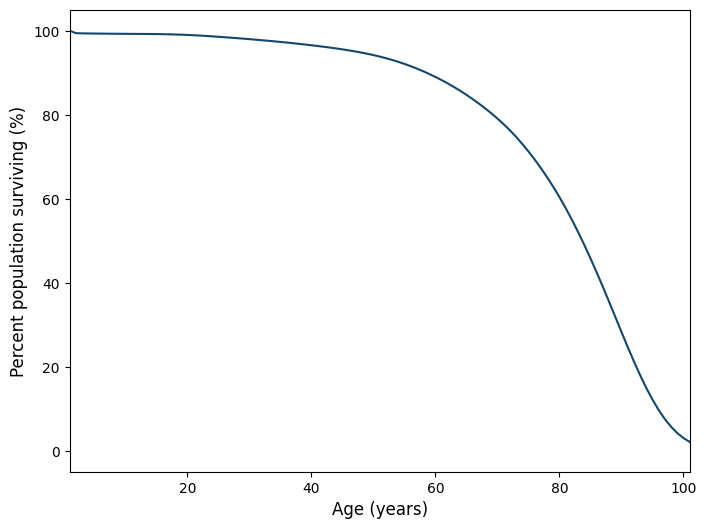

In [8]:
# Example 3: Plot period survival curve

import matplotlib.pyplot as plt
import numpy as np

# Define x- and y-values
ages = lifeDF['age']
survival_percent = lifeDF['lx']/1000

# Define color
color_1 = '#15466d'

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(ages, survival_percent, color=color_1)

# Add labels and title
plt.xlabel('Age (years)', fontsize=12)
plt.ylabel('Percent population surviving (%)', fontsize=12)

# Set the limits for x and y axes
plt.xlim(ages.min(), ages.max())
plt.ylim(-5, 105)

# Display grid
plt.grid(False)

# Show the plot
plt.show()


If the code is correct, you should see the following plot:

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_12_image37.png)

## **Life Table with Small Population Size**

Ideally, we would prefer to work with a cohort life table, which tracks a group of people longitudinally over their entire lifetimes. This method is not practical for large population studies, however. It would involve following a sizable group of individuals for over 100 years. However, it is often used in smaller studies in which patients are enrolled sequentially and followed for
shorter periods of time. Furthermore, these methods are often applied to samples rather than entire nopulations: inference is then made based on what is observed in the sample.

Using the life table method, we could summarize the data for the 12 patients as in **Table 20.3**. Note that the first column contains survival time after diagnosis rather than age. A survival time of $t$ months means that an individual survived until time $t$ and then died immediately after. Since 1 out
of the 12 individuals in the initial cohort died at 2 months, the proportion of patients dying in the interval 2-3 months is estimated as

$$ q_2 = \frac{1}{12} = 0.0833. $$

One of the remaining 11 individuals died at 3 months; consequently,

$$ q_2 = \frac{1}{11} = 0.0909. $$

Similarly, 2 of the remaining 10 patients died at six months, and

$$ q_2 = \frac{2}{10} = 0.2000. $$




![___](https://biologicslab.co/BIO5853/images/module_03/lesson_03_12_image04.png)

**TABLE 20.2** Interval from primary `AIDS` diagnosis until death for a sample of 12 hemophiliac patients at most 40 years of age a `HIV` seroconversion.

Recall from Chapter 4 that $q_t$ is also called the _hazard function_. In time intervals not containing a death, such as 0-1 months and 1-2 months, the estimated hazard function is equal to 0.

The fourth column of **Table 20.3** contains the proportion of individuals who do not fail during a given interval. In the interval 2-3 months, for example, the proportion of patients who died is q2 = 0.0833, and thus the proportion who survived is

$$ 1−q2=1−0.0833=0.9167.$$

In time intevals not containing a death, the estimated proportion of patients who do not fail is 1.

![___](https://biologicslab.co/BIO5853/images/module_03/lesson_03_12_image05.png)

**TABLE 20.3** Life table method of estimating $S(t)$ for hemophiliac patients at most 40 years of age a `HIV` seroconversion.

### Example 4:  Plot Survival Curve from Data

The code in the cell below shows how to recreate **Figure 20.3** on page 486 using Python. In this example, we can directly plot the survival curve from data in the DataFrame `hemoDF`. Later we will have to process the data before it can be plotted.

![___](https://biologicslab.co/BIO5853/images/module_03/lesson_03_12_image06.png)

**FIGURE 20.3** Survival curve for hemophiliac patients at most 40 years of age at `HIV` seroconversion, estimated using the life table method.



_Code Decription:_

The plotting is done twice. We first plot the solid line with `ax.plot()` and then the markers with `ax.scatter()`.

```python
# Create line graph
linegraph = ax.plot(x,y, color=color_1, linestyle='-')

# Create the scatter plot
scatter = ax.scatter(x, y, facecolors='white',
                     edgecolors=color_1,
                     zorder=3)
```




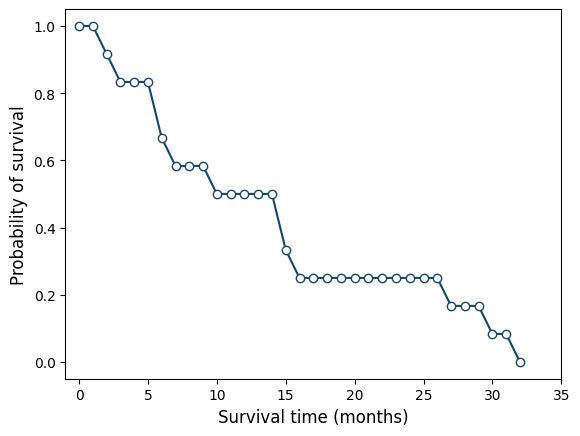

In [9]:
# Example 4: Plot survival curve from data

import matplotlib.pyplot as plt
import numpy as np

# Make copy
df = hemoDF.copy()

# Assign x and y
x = df['month'].values
y = df['survival'].values

# Create plotting environment
fig, ax = plt.subplots()

# Define color
color_1 = '#15466d'

# Create line graph
linegraph = ax.plot(x,y, color=color_1, linestyle='-')

# Create the scatter plot
scatter = ax.scatter(x, y, facecolors='white',
                     edgecolors=color_1,
                     zorder=3)

# Set x-axis limits
ax.set_xlim(-1,35)

# Adding labels
ax.set_xlabel('Survival time (months)', fontsize=12)
ax.set_ylabel('Probability of survival', fontsize=12)

# Display the plot
plt.show()

If the code is correct, you should see the following plot:

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_12_image38.png)



**FIGURE 20.3** Survival curve for hemophiliac patients at most 40 years of age at `HIV` seroconversion, estimated using the life table method.

![___](https://biologicslab.co/BIO5853/images/module_03/lesson_03_12_image07.png)


# **Product-Limit Method**

When we use the life table method, the estimated survival function S(t) changes only during the time intervals in which at least one death occurs. For smaller datasets, such as the sample of 12 hemophiliac patients diagnosed with urv/arps, there can be many intervals without a single death. In these instances, it is not efficient to present the survival function in this way. The product-limit method of estimating a survival function, also called the Kaplan-Meier method, is a nonparametric technique that uses the exact survival time for each individual in a sample instead of grouping the times into intervals.

**Table 20.4** displays the product-limit estimate of the survival function for the sample of 12 hemophiliacs under the age of 40 at the time of Hiv seroconversion. Instead of time intervals, the first column of the table contains the exact times at which at least one failure occurred; patients
died 2 months after diagnosis, 3 months after diagnosis, 6 months after diagnosis, and so on. The patient with the longest survival died 32 months after primary arps diagnosis. The second column of the table lists the proportions of patients alive just prior to each time ¢ who fail at that time, and the third column the proportions of individuals who do not fail at $t$. Using the multiplicative rule of probability, the proportions of individuals who survive beyond each time ¢ can be estimated; the technique is the same as it was for the life table method.

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_12_image08.png)

**TABLE 20.4** Product-limit method of estimating the survival function $S(t)$ for hemophiliac patients at most 40 years of age at `HIV` seroconversion.

## **Install `lifelines` Package**

## Lifelines: Survival Analysis in Python

The **lifelines** package is a **Python library** designed for survival analysis. Survival analysis is a branch of statistics that deals with analyzing the expected duration of time until one or more events happen, such as death in biological organisms and failure in mechanical systems. It's widely used in fields like medicine, biology, engineering, economics, and social sciences.

### Key Features of Lifelines:
1. **Kaplan-Meier Estimator**: Used to estimate the survival function from lifetime data.
2. **Nelson-Aalen Estimator**: Used to estimate the cumulative hazard function.
3. **Cox Proportional Hazards Model**: A regression model commonly used in medical research for investigating the association between the survival time of patients and one or more predictor variables.
4. **Parametric Models**: Lifelines also supports parametric survival models, which assume a specific distribution for the survival times.
5. **Censoring**: Handles right-censored data, which is common in survival analysis where the event of interest has not occurred for some subjects during the study period.

### How It Works:
1. **Data Preparation**: You start by preparing your data, which typically includes survival times and event indicators (whether the event of interest has occurred).
2. **Model Fitting**: You fit a survival model to your data using lifelines' functions. For example, you can fit a Kaplan-Meier estimator or a Cox proportional hazards model.
3. **Prediction**: Once the model is fitted, you can use it to make predictions about survival probabilities or hazard rates for new data points.
4. **Visualization**: Lifelines provides functions to plot survival curves, cumulative hazard functions, and other visualizations to help interpret the results.

Run the next code cell to install the `lifelines` package.


In [10]:
pip install lifelines


## **Survival Curves -- Product-Limit Method**

The survival curve corresponding to the survival function in **Table 20.4** is plotted in **Figure 20.4**. When the product-limit method is used, $S(t)$ is assumed to remain the same over the time periods between deaths. It changes only when a subject fails.

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_12_image09.png)

**FIGURE 20.4** Survival curve for hemophiliac patients at most 40 years of age at `HIV` seroconversion, estimated using the product-limit method.

Keep in mind that $S(t)$ was calculated using the data in a single sample of observations drawn from the underlying population. If we were to select a second sample of 12 hemophiliacs and calculate another survival function using the product-limit method, the results would differ from those in **Figure 20.4**. $S(t)$ is an estimate of the true population survival function for all hemophiliacs diagnosed with `HIV/AIDS` in the mid to late 1980s who were at most 40 years of age at HIv seroconversion.



### Example 5: Survival Curves -- Product-Limit Method

The code in the cell below, recreates **FIGURE 20.4**. It takes advantage of the Kaplan-Meirer procedure.

## Kaplan-Meier Procedure

The **Kaplan-Meier procedure** is a non-parametric statistical method used to estimate the survival function from lifetime data. It’s particularly useful in medical research and other fields where you need to analyze the time until a certain event, like death, relapse, or failure, occurs. This method can handle censored data, which means it accounts for cases where the event hasn't occurred for all subjects during the study period.

### Key Components of the Kaplan-Meier Procedure:

1. **Survival Function (S(t))**: Represents the probability that a subject will survive past time \( t \). It is a step function that changes value only at the time of each event.

2. **Censored Data**: Data for subjects whose events (e.g., death, relapse) are not observed within the study period. These cases contribute to the analysis up to the point they are censored.

3. **Kaplan-Meier Estimator**: This is the formula used to estimate the survival function:
   

$$
   \hat{S}(t) = \prod_{t_i \leq t} \left(1 - \frac{d_i}{n_i}\right)
   \ $$


   Where:
   -  $t_i$  = time when an event occurs
   -  $d_i$ = number of events at time $t_i$
   -  $n_i$ = number of subjects known to have survived up to time $t_i$

### How It Works:

1. **Data Collection**: Collect data on the time until the event of interest occurs for each subject. Note which subjects are censored.

2. **Calculate Survival Probabilities**: For each time point where an event occurs, calculate the probability of surviving past that time.

3. **Estimate the Survival Function**: Multiply the survival probabilities from each preceding time point to get the overall survival function.

4. **Plotting the Survival Curve**: The Kaplan-Meier survival curve is a step function that provides a visual representation of the survival probabilities over time.

_Code Description:_

The data needed for plotting comes from the data in **Table 20.4** using this code chunk:

```python
# Use the data in Table 20.4
data = {
    'survival_time': [0, 2, 3, 6, 7, 10, 15, 16, 27, 30, 32],
    'q_t': [0.0000, 0.0833, 0.0909, 0.2000, 0.1250, 0.1429, 0.3333, 0.2500, 0.3333, 0.5000, 1.0000]
}

```




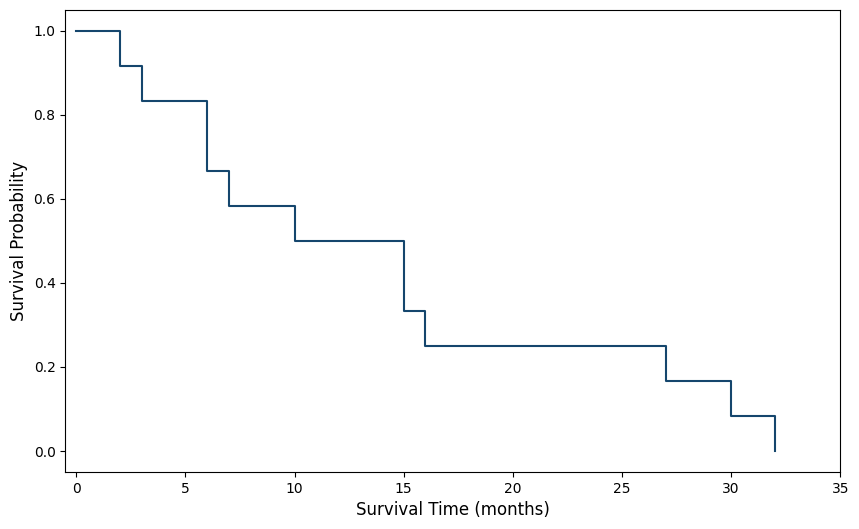

In [11]:
# Example 5: Survival curves -- product-limit method

import pandas as pd
import matplotlib.pyplot as plt

# Use the data in Table 20.4
data = {
    'survival_time': [0, 2, 3, 6, 7, 10, 15, 16, 27, 30, 32],
    'q_t': [0.0000, 0.0833, 0.0909, 0.2000, 0.1250, 0.1429, 0.3333, 0.2500, 0.3333, 0.5000, 1.0000]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Calculate 1 - q_t
df['1 - q_t'] = 1 - df['q_t']

# Calculate the survival function S(t)
df['S(t)'] = df['1 - q_t'].cumprod()

# Ensure the first survival probability is 1.0
df.at[0, 'S(t)'] = 1.0

# Define color
color_1 = '#15466d'

# Plot the survival function
plt.figure(figsize=(10, 6))
plt.step(df['survival_time'], df['S(t)'], where='post', color=color_1, linestyle='-', linewidth=1.5)

# Customize the plot
plt.xlabel('Survival Time (months)', fontsize=12)
plt.ylabel('Survival Probability', fontsize=12)
plt.ylim(-0.05, 1.05)
plt.xlim(-0.5, 35)
plt.grid(False)

# Show the plot
plt.show()


If the code is correct, you should see the following plot:

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_12_image44.png)



The output matches **FIGURE 20.4**

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_12_image09.png)


**FIGURE 20.4** Survival curve for hemophiliac patients at most 40 years of age at `HIV` seroconversion, estimated using the product-limit method.

### Example 6: Add 95% Confidence Interval to Survival Curve

The code in the cell below recreates **FIGURE 20.5** on page 489 in your textbook.
![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_12_image10.png)

_Code Description:_

The code utilizes the Kaplan-Meier procedure that was included in the `lifelines` software package. The code chunk below 'fits' the data in the DataFrame `hemo_ageDF['survival']` and `hemo_ageDF['_t']` to the `KaplanMeierFitter()` function.

```python
# Create and fit the Kaplan-Meier Fitter
kmf = KaplanMeierFitter()
kmf.fit(df['survival'], event_observed=df['_t'])

```


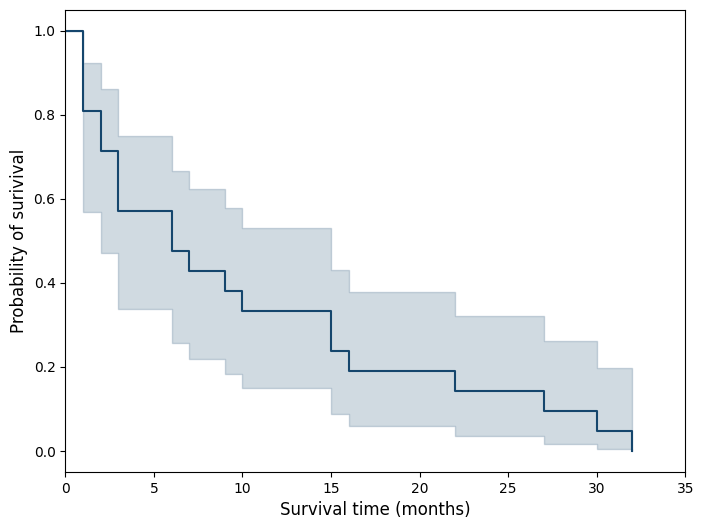

In [12]:
# Example 6: Add 95% Confidence Interval to Survival Curve

import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

df = hemo_ageDF.copy()

# Create and fit the Kaplan-Meier Fitter
kmf = KaplanMeierFitter()
kmf.fit(df['survival'], event_observed=df['_t'])

# Define color
color_1 = '#15466d'

# Plot the survival curve
plt.figure(figsize=(8, 6))
kmf.plot_survival_function(ci_show=True, legend=False,
                           color=color_1, ci_alpha=0.2)

# Customize the plot
plt.xlabel('Survival time (months)', fontsize=12)
plt.ylabel('Probability of surivival', fontsize=12)
plt.grid(False)

# Set custom x-axis limits
plt.xlim(0, 35)  # Change these values to your desired limits

# Show the plot
plt.show()



If the code is correct, you should see the following plot:

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_12_image40.png)

The output matches **FIGURE 20.5**

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_12_image10.png)

**FIGURE 20.5** Survival curve for hemophiliac patients at most 40 years of age at `HIV` seroconversion, with 95% confidence bands.

The product-limit method for estimating a survival curve can be generalized to account for the yartial information about survival times available from censored observations. Suppose that when the data for the 12 hemophiliac arps patients were analyzed, the individuals with the second and sixth longest survival times had not yet died. Instead, they were still alive after 3 and 10 months of follow-up, respectively. In **Table 20.5**, these censored observations are designated by a plus (+) sign.

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_12_image12.png)

**TABLE 20.5** Interval from primary `AIDS` diagnosis until death for a sample of 12 hemophiliac patients at most 40 years of age at `HIV` seroconversion, censored observations included.


The product-limit estimate of the survival function incorporating the censored times is calculated in **Table 20.6**, and plotted in **Figure 20.6**.
![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_12_image13.png)

**TABLE 20.6** Product-limit method of estimating $St$ for hemophiliac patients at most 40 years of age at HIV seroconversion, censored observations included.

Each small $x$ on the graph denotes a censored survival time. Note that $\hat{S}(t)$ does not change from its previous value if the observation at time $t$ is censored; however, this observation is not used to calculate the probability of failure at any subsequent time point. At time 3, for instance, a patient is censored but no one dies. Therefore,

$$ q_3 = \frac{0}{11} = 0 $$



![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_12_image14.png)

**FIGURE 20.6** Survival curve for hemophiliac patients at most 40 years of age at `HIV` seroconversion, censored observations included.



### Example 7: Survival Plot with Censored Data

The code in the cell below recreates **FIGURE 20.6** which shows a survival curve for hemophiliac patients at most 40 years of age at `HIV` seroconversion, with the censored observations included.

_Code Description:_

The data needed for plotting comes from the data in **Table 20.5** using this code chunk:

```python
# Use the data in Table 20.5
data = {
    'survival_time': [0, 2, 3, 6, 7, 10, 15, 16, 27, 30, 32],
    'q_t': [0.0000, 0.0833, 0.0000, 0.2000, 0.1250, 0.0000, 0.3333, 0.2500, 0.3333, 0.5000, 1.0000]
}
```

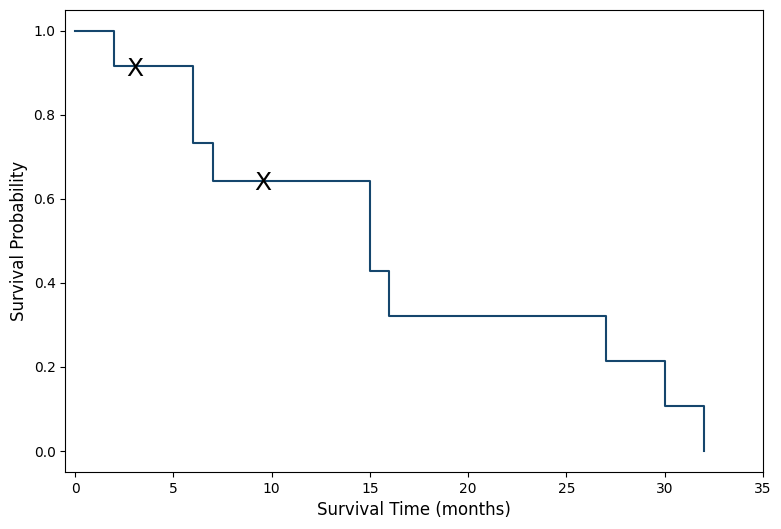

In [13]:
# Example 7:Example 7: Survival Plot with Censored Data

import pandas as pd
import matplotlib.pyplot as plt

# Use the data in Table 20.5
data = {
    'survival_time': [0, 2, 3, 6, 7, 10, 15, 16, 27, 30, 32],
    'q_t': [0.0000, 0.0833, 0.0000, 0.2000, 0.1250, 0.0000, 0.3333, 0.2500, 0.3333, 0.5000, 1.0000]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Calculate 1 - q_t
df['1 - q_t'] = 1 - df['q_t']

# Calculate the survival function S(t)
df['S(t)'] = df['1 - q_t'].cumprod()

# Ensure the first survival probability is 1.0
df.at[0, 'S(t)'] = 1.0

# Define color
color_1 = '#15466d'

# Plot the survival function
plt.figure(figsize=(9, 6))
plt.step(df['survival_time'], df['S(t)'], where='post', color=color_1, linestyle='-', linewidth=1.5)

# Customize the plot
plt.xlabel('Survival Time (months)', fontsize=12)
plt.ylabel('Survival Probability', fontsize=12)
plt.ylim(-0.05, 1.05)
plt.xlim(-0.5, 35)
plt.grid(False)

# Plot text
plt.text(3.5, 0.88, 'X', fontsize=18, verticalalignment='bottom', horizontalalignment='right')
plt.text(10.0, 0.61, 'X', fontsize=18, verticalalignment='bottom', horizontalalignment='right')

# Show the plot
plt.show()


If the code is correct, you should see the following plot:

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_12_image45.png)

The output matches **FIGURE 20.6**

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_12_image14.png)

**FIGURE 20.6** Survival curve for hemophiliac patients at most 40 years of age at `HIV` seroconversion, censored observations included.

# **Log-Rank Test**

Instead of simply describing the survival times for a single group of subjects, we often want to compare the distributions of survival times for two or more different populations. Our goal would be to determine whether survival differs systematically between the groups. Recall the data for the 12 hemophiliacs — all 40 years of age or younger at the time of Hrv seroconversion — presented
in Table 20.2. We might wish to compare this distribution of survival times from primary `AIDS` diagnosis until death to the distribution of survival times for another group of hemophiliacs who were all over age 40 at the time of seroconversion. Survival times for the two groups are listed in **Table 20.7**, and the product-limit estimates of the survival curves are plotted in **Figure 20.7**.

**TABLE 20.7**

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_12_image15.png)

**FIGURE 20.7**

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_12_image16.png)

Survival for patients undergoing HIv seroconversion at an earlier age is represented by the upper curve in the figure, and survival for patients undergoing seroconversion at a later age by the lower curve. At any point in time following ars diagnosis, the estimated probability of survival beyond that time is higher for individuals who were younger at seroconversion. We would of course expect some sampling variability in these estimates. Therefore we ask — is the difference between the two curves greater than might be expected by chance alone?

One of a number of different methods available for testing the null hypothesis that two or more distributions of survival times are identical is a nonparametric technique called the log-rank test. The idea behind the log-rank test is that we construct a separate 2 x 2 contingency table displaying group
status (in this example, age category at seroconversion < 40 years or > 40 years) versus survival status for each time point ¢ at which a death occurs. When $t$ is equal to 1 month, for example, none of the 12 patients who were younger than 40 years at seroconversion die, but 4 of the 9 older patients
do. Therefore, the 2 x 2 table for $t$ = 1 month is:


![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_12_image17.png)

Similarly, when $t$ is equal to 2 months, one of the 12 younger patients and one of the 5 remaining  older patients die. Consequently, the 2 × 2 table for $t$ = 2 months is:


![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_12_image18.png)

### Example 8: Log-Rank Plot

The code on the cell below recreates **FIGURE 20.7** which is a survival curve for hemophiliac patients stratified by age at `HIV` seroconversion. The data for the plot comes from **Table 20.7**.

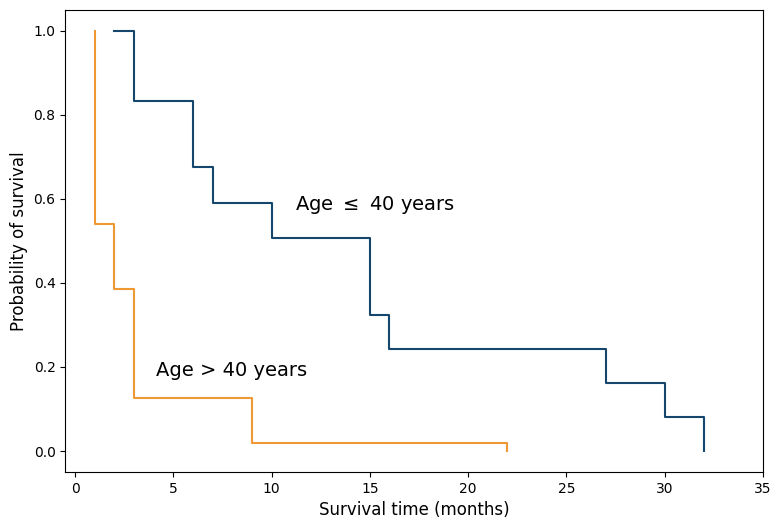

In [14]:
# Example 8: Log-rank plot

import pandas as pd
import matplotlib.pyplot as plt


# Get data from Table 20.7
# Data for Age ≤ 40 Years
data_40_or_less = {
    'patient_num': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'survival_time': [2, 3, 6, 6, 7, 10, 15, 15, 16, 27, 30, 32],
    'q_t': [0.0833, 0.0909, 0.1000, 0.1000, 0.1250, 0.1429, 0.2000, 0.2000, 0.2500, 0.3333, 0.5000, 1.0000]
}

# Data for Age > 40 Years
data_above_40 = {
    'patient_num': [1, 2, 3, 4, 5, 6, 7, 8, 9],
    'survival_time': [1, 1, 1, 1, 2, 3, 3, 9, 22],
    'q_t': [0.1429, 0.1429, 0.1429, 0.1429, 0.2857, 0.4286, 0.4286, 0.8571, 1.0000]
}

# Create DataFrames
df_40_or_less = pd.DataFrame(data_40_or_less)
df_above_40 = pd.DataFrame(data_above_40)

# Calculate 1 - q_t
df_40_or_less['1 - q_t'] = 1 - df_40_or_less['q_t']
df_above_40['1 - q_t'] = 1 - df_above_40['q_t']

# Calculate the survival function S(t)
df_40_or_less['S(t)'] = df_40_or_less['1 - q_t'].cumprod()
df_above_40['S(t)'] = df_above_40['1 - q_t'].cumprod()

# Ensure the first survival probability is 1.0 for each DataFrame
df_40_or_less.at[0, 'S(t)'] = 1.0
df_above_40.at[0, 'S(t)'] = 1.0


# Define color
color_1 = '#15466d'
color_2 = '#ee9933'

# Plot the survival functions
plt.figure(figsize=(9, 6))

# Age ≤ 40 Years
plt.step(df_40_or_less['survival_time'], df_40_or_less['S(t)'], where='post', color=color_1, linestyle='-', linewidth=1.5)

# Age > 40 Years
plt.step(df_above_40['survival_time'], df_above_40['S(t)'], where='post', color=color_2, linestyle='-', linewidth=1.5)

# Customize the plot
plt.xlabel('Survival time (months)', fontsize=12)
plt.ylabel('Probability of survival', fontsize=12)
plt.ylim(-0.05, 1.05)
plt.xlim(-0.5, 35)
plt.grid(False)

# Plot text
plt.text(19.3, 0.56, "Age $\leq$ 40 years", fontsize=14, verticalalignment='bottom', horizontalalignment='right')
plt.text(11.8, 0.17, "Age > 40 years", fontsize=14, verticalalignment='bottom', horizontalalignment='right')

# Show the plot
plt.show()


If the code is correct, you should see the following plot:

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_12_image46.png)



The output matches **FIGURE 20.4**

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_12_image16.png)


**FIGURE 20.7** Survival curve for hemophiliac patients stratified by age at `HIV` seroconversion.

### Example 9: Survival Curves -- Log-Rank Plot


The code in this example recreates **FIGURE 20.8** on page 493 in your textbook.

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_12_image19.png)


**FIGURE 20.8** Survival curve for moderate risk breast cancer patients in two treatment groups.

_Code Description:_

Instead of using data obtained from a table, we can use the data in the DataFrame `bcDF`.

Since we want to compare the effects of "Treatment A" versus "Treatment B", we will divide the DataFrame into two DataFrames called `df_A` and `df_B` using this code chunk:

```python

# Make copy
df=bcDF.copy()

# Divide the DataFrame into two based on the value in the 'treatment' column
df_A = df[df['treatment'] == 1]
df_B = df[df['treatment'] == 2]

```
After making two copies of the `KaplanMeierFitter`, we can generate our survival functions using this code chunk:

```python
# Fit the data
kmf_A.fit(df_A['survival'], df_A['censor'])
kmf_B.fit(df_B['survival'], df_B['censor'])

```

In this example, the survival functions are plotted using the following code chunk:

```python
# Plot the survival functions
plt.figure(figsize=(9, 6))
kmf_A.plot_survival_function(ci_show=False, color=color_2, legend=False)
kmf_B.plot_survival_function(ci_show=False, color=color_1, legend=False)

```

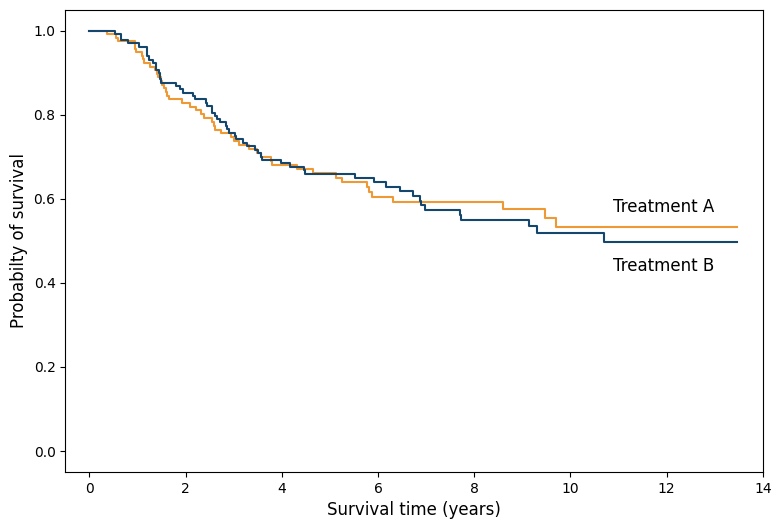

In [15]:
# Example 9: Survival Curves -- Log-Rank Plot

import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

# Make copy
df=bcDF.copy()

# Divide the DataFrame into two based on the value in the 'treatment' column
df_A = df[df['treatment'] == 1]
df_B = df[df['treatment'] == 2]

# Initialize the KaplanMeierFitter
kmf_A = KaplanMeierFitter()
kmf_B = KaplanMeierFitter()

# Fit the data
kmf_A.fit(df_A['survival'], df_A['censor'])
kmf_B.fit(df_B['survival'], df_B['censor'])

# Define color
color_1 = '#15466d'
color_2 = '#ee9933'

# Plot the survival functions
plt.figure(figsize=(9, 6))
kmf_A.plot_survival_function(ci_show=False, color=color_2, legend=False)
kmf_B.plot_survival_function(ci_show=False, color=color_1, legend=False)

# Add titles and labels
plt.ylabel('Probabilty of survival', fontsize=12)
plt.xlabel('Survival time (years)', fontsize=12)

# Plot text
plt.text(13, 0.56, "Treatment A", fontsize=12, verticalalignment='bottom', horizontalalignment='right')
plt.text(13, 0.42, "Treatment B", fontsize=12, verticalalignment='bottom', horizontalalignment='right')

# Set limits
plt.ylim(-0.05, 1.05)
plt.xlim(-0.5, 14)
plt.grid(False)



# Display the plot
plt.show()


If the code is correct, you should see the following plot:

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_12_image47.png)



The output matches **FIGURE 20.8**

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_12_image19.png)


**FIGURE 20.8** Survival curve for moderate risk breast cancer patients in two treatment groups.

### Example 10: Survival Curves -- Log-Rank Plot


The code in this example recreates **FIGURE 20.9** on page 493 in your textbook.

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_12_image20.png)


**FIGURE 20.9** Survival curve for premenopausal, moderate risk breast cancer patients in two treatment groups.

_Code Description:_

The code below is essentially the same code used in Example 9. The only significant difference is that we needed to remove postmenopausal women from the data. Here is the code chunk that accomplished this separation:

```python
# Divide the DataFrame into two based on the values in the 'treatment' and 'group' columns
df_A = df[(df['treatment'] == 1) & (df['menopause'] == 1)]
df_B = df[(df['treatment'] == 2) & (df['menopause'] == 1)]

```
Notice that _both_ new DataFrames, `df_A` and `df_B` used the same `menopause=1` criteria since `1` was the numerical value for `premenopausal`.

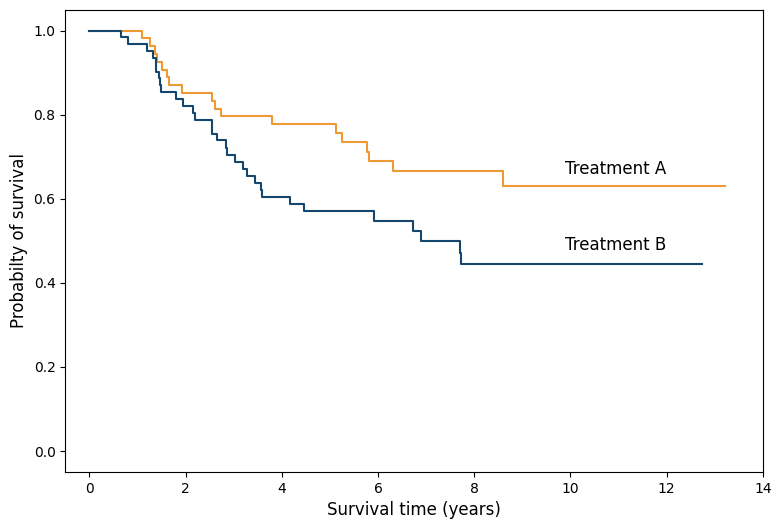

In [16]:
# Example 9: Survival Curves -- Log-Rank Plot

import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

# Make copy
df=bcDF.copy()

# Divide the DataFrame into two based on the values in the 'treatment' and 'group' columns
df_A = df[(df['treatment'] == 1) & (df['menopause'] == 1)]
df_B = df[(df['treatment'] == 2) & (df['menopause'] == 1)]

# Initialize the KaplanMeierFitter
kmf_A = KaplanMeierFitter()
kmf_B = KaplanMeierFitter()

# Fit the data
kmf_A.fit(df_A['survival'], df_A['censor'])
kmf_B.fit(df_B['survival'], df_B['censor'])

# Define color
color_1 = '#15466d'
color_2 = '#ee9933'

# Plot the survival functions
plt.figure(figsize=(9, 6))
kmf_A.plot_survival_function(ci_show=False, color=color_2, legend=False)
kmf_B.plot_survival_function(ci_show=False, color=color_1, legend=False)

# Add titles and labels
plt.ylabel('Probabilty of survival', fontsize=12)
plt.xlabel('Survival time (years)', fontsize=12)

# Plot text
plt.text(12, 0.65, "Treatment A", fontsize=12, verticalalignment='bottom', horizontalalignment='right')
plt.text(12, 0.47, "Treatment B", fontsize=12, verticalalignment='bottom', horizontalalignment='right')

# Set limits
plt.ylim(-0.05, 1.05)
plt.xlim(-0.5, 14)
plt.grid(False)



# Display the plot
plt.show()


If the code is correct, you should see the following plot:

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_12_image48.png)



The output matches **FIGURE 20.9**

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_12_image20.png)


**FIGURE 20.9** Survival curve for premenopausal, moderate risk breast cancer patients in two treatment groups.

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_12_image21.png)


## **Lesson Turn-in**

When you have completed and run all of the code cells, create a PDF of your notebook and upload the **PDF** to your Lesson_03_12 assignment in Canvas for grading.
